In [83]:
import os
import sys
from readrec import *
import matplotlib
from scipy.signal import find_peaks
import numpy as np
import pandas as pd
import re
import glob
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import datetime as dt
import matplotlib.dates as mdates

from scipy.constants import speed_of_light

c = speed_of_light

sps = 10e6 # 10 Msps

%matplotlib inline
%config InlineBackend.close_figures=True

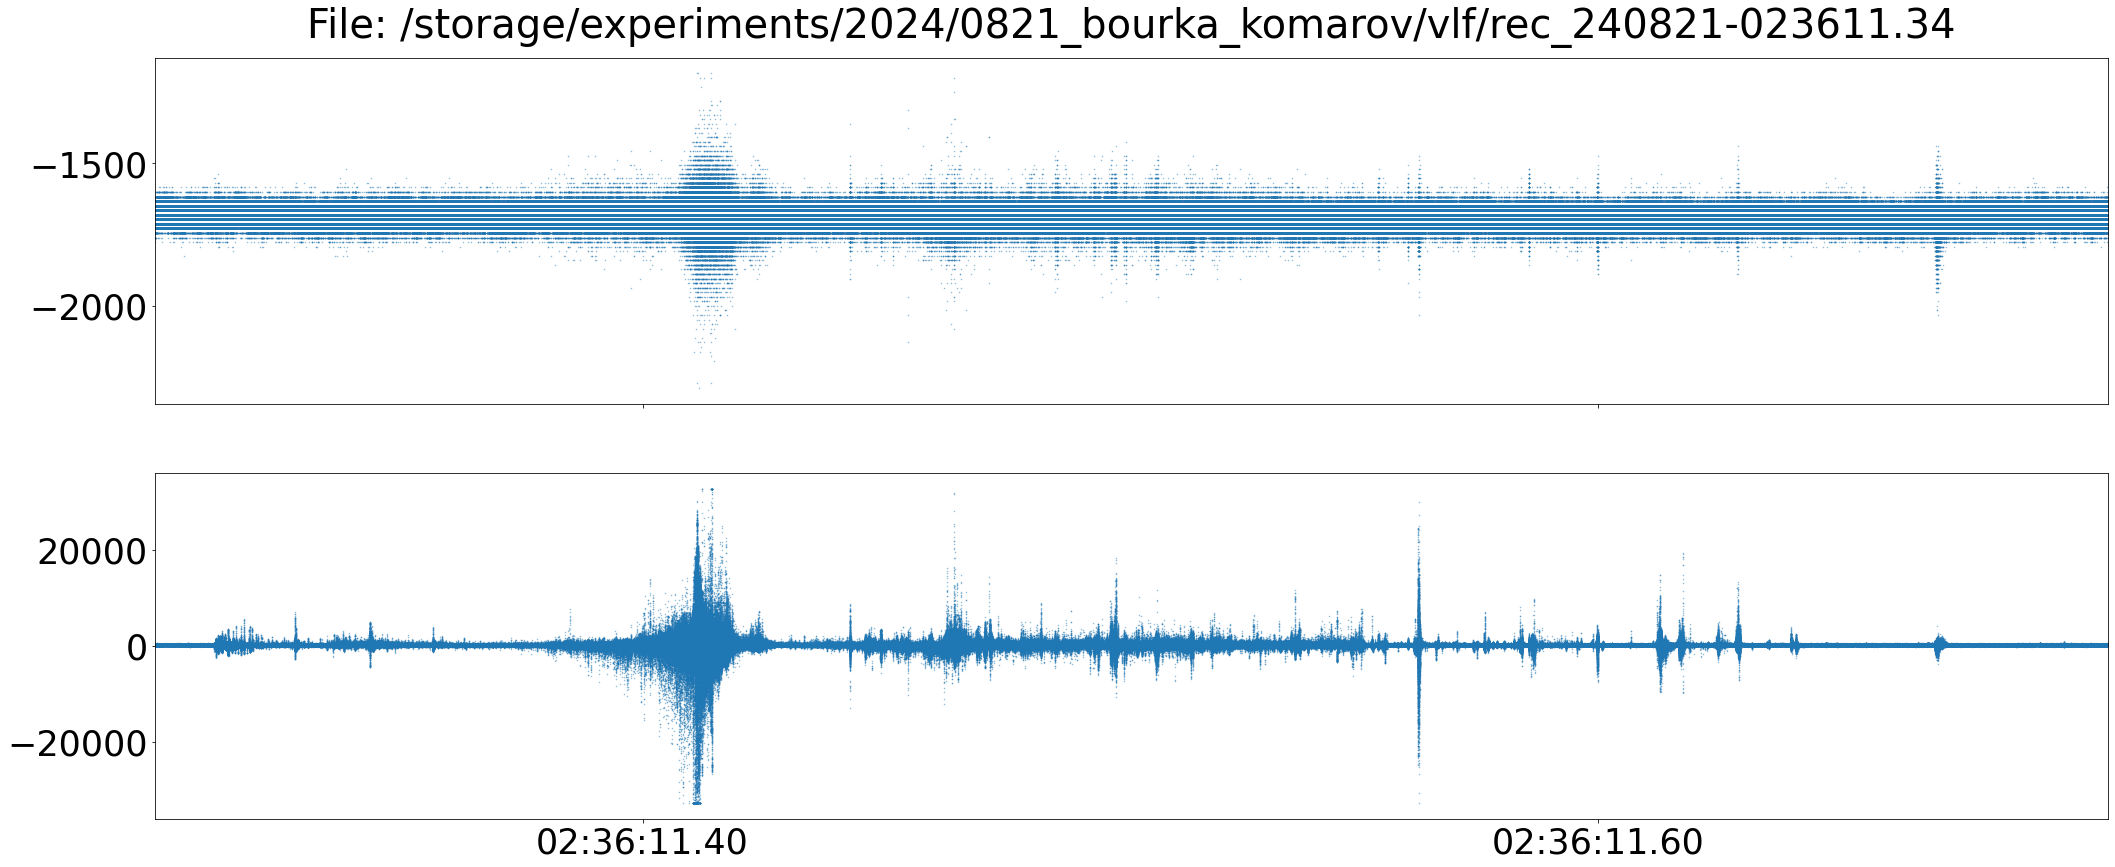

In [84]:

filepath = '/storage/experiments/2024/0821_bourka_komarov/vlf/rec_240821-023611.34'

#channels = [0,1,2,3,4,5,6,7]
channels = [2,1]
nrows = len(channels) * 1
fig, axs = plt.subplots(figsize=(35, 7 * nrows), nrows=nrows, sharex=True)

mintime = None
data = []

# Load and process data
try:
    with open(filepath, 'rb') as file:
        fn = os.path.basename(filepath)
        h, samples, synclog = loadrec(file)
        t2s, s2t, ticker, formatter = assign_time_axis(fn, h, synclog)

        time = s2t(0)
        mintime = time if mintime is None else min(mintime, time)

        # Add data to the list for later processing
        data.append((filepath, h, samples, synclog, t2s, s2t, ticker, formatter))
except Exception as e:
    print(f"Exception: {e}")

# Render data
ax_idx = 0
for i, (filepath, h, samples, synclog, t2s, s2t, ticker, formatter) in enumerate(data):
    offset = -int(t2s(mintime))

    # Use full path for the file label only once above the first channel
    axs[ax_idx].set_title(f"File: {filepath}", fontsize=40, pad=20)

    a = (h['preTrigger'] - h['preTrigger']) * h['descSpan'] // 16
    b = (h['preTrigger'] + h['postTrigger']) * h['descSpan'] // 16
    for ch in channels:
        signal_samples = samples[a:b, ch]

        axs[ax_idx].xaxis.set_major_locator(ticker)
        axs[ax_idx].xaxis.set_major_formatter(formatter)
        axs[ax_idx].plot(range(a + offset, b + offset), signal_samples, linestyle="", marker=".", alpha=0.5, markersize=1)

        axs[ax_idx].tick_params(axis='x', which='major', labelsize=35)
        axs[ax_idx].tick_params(axis='y', which='major', labelsize=35)
        axs[ax_idx].set_xlim(14614528/3+2000000,14614528/4*3)

        ax_idx += 1


plt.show()

In [77]:
signal_samples.shape

(14614528,)

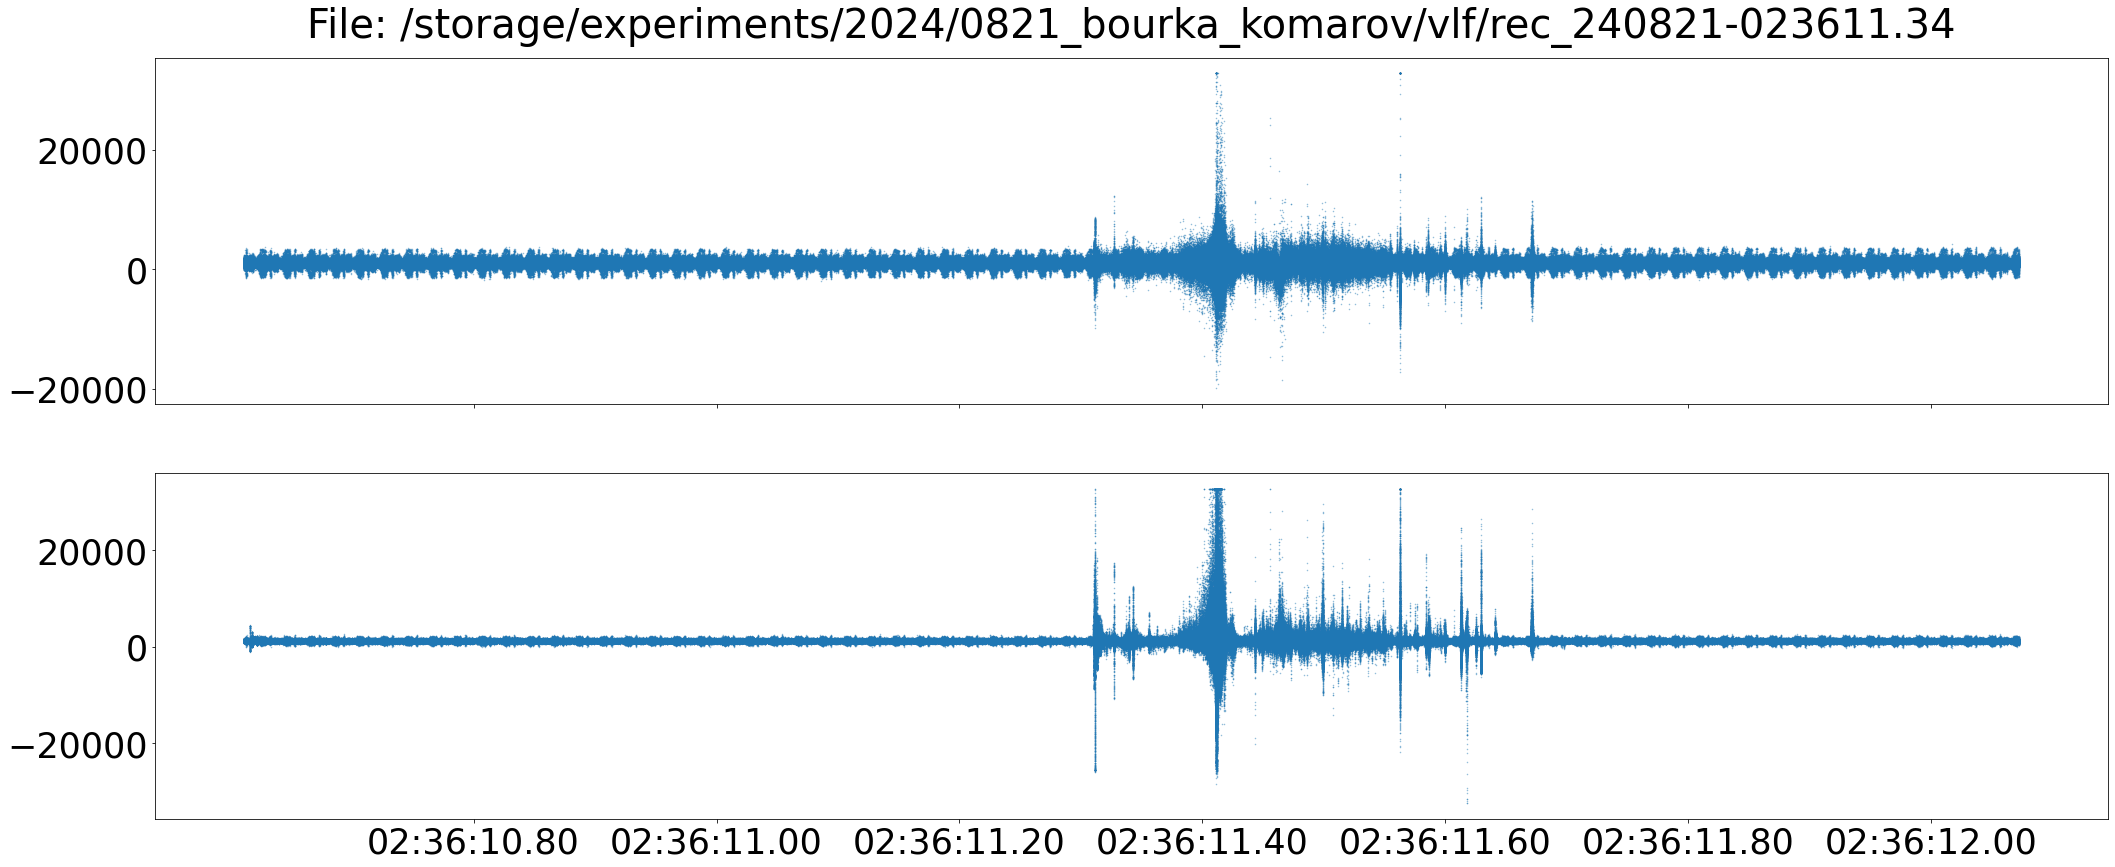

In [108]:

filepath = '/storage/experiments/2024/0821_bourka_komarov/vlf/rec_240821-023611.34'

channels = [0,1,3]
channels = [0,3]
nrows = len(channels) * 1
fig, axs = plt.subplots(figsize=(35, 7 * nrows), nrows=nrows, sharex=True)

mintime = None
data = []

# Load and process data
try:
    with open(filepath, 'rb') as file:
        fn = os.path.basename(filepath)
        h, samples, synclog = loadrec(file)
        t2s, s2t, ticker, formatter = assign_time_axis(fn, h, synclog)

        time = s2t(0)
        mintime = time if mintime is None else min(mintime, time)

        # Add data to the list for later processing
        data.append((filepath, h, samples, synclog, t2s, s2t, ticker, formatter))
except Exception as e:
    print(f"Exception: {e}")

# Render data
ax_idx = 0
for i, (filepath, h, samples, synclog, t2s, s2t, ticker, formatter) in enumerate(data):
    offset = -int(t2s(mintime))

    # Use full path for the file label only once above the first channel
    axs[ax_idx].set_title(f"File: {filepath}", fontsize=40, pad=20)

    a = (h['preTrigger'] - h['preTrigger']) * h['descSpan'] // 16
    b = (h['preTrigger'] + h['postTrigger']) * h['descSpan'] // 16
    for ch in channels:
        signal_samples_vlf = samples[a:b, ch]
        #signal_samples = samples[a:b, ch]

        axs[ax_idx].xaxis.set_major_locator(ticker)
        axs[ax_idx].xaxis.set_major_formatter(formatter)
        axs[ax_idx].plot(range(a + offset, b + offset), signal_samples_vlf, linestyle="", marker=".", alpha=0.5, markersize=1)

        axs[ax_idx].tick_params(axis='x', which='major', labelsize=35)
        axs[ax_idx].tick_params(axis='y', which='major', labelsize=35)

        ax_idx += 1


plt.show()

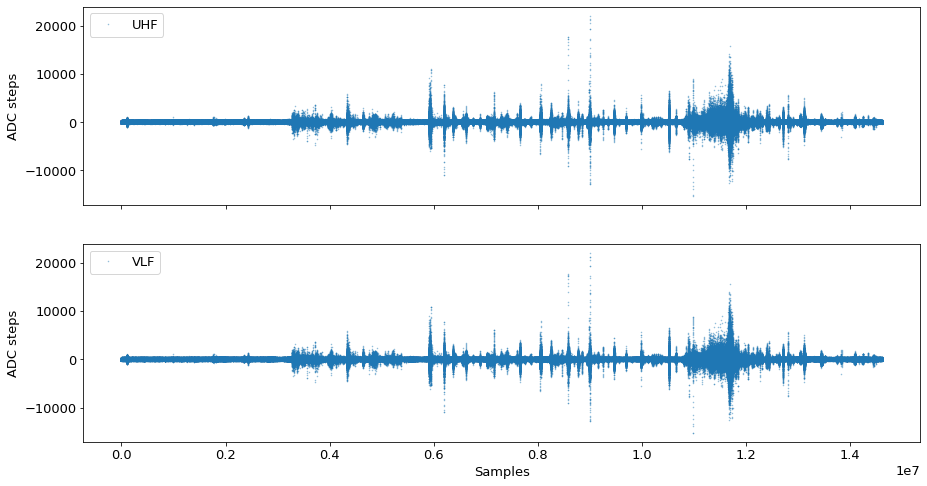

In [135]:
plt.rcParams.update({'font.size': 13})
fig, (ax) = plt.subplots(nrows=2, sharex=True, figsize=(15,8))

ax[0].plot(signal_samples, linestyle="", marker=".", alpha=0.5, markersize=1, label='UHF')
ax[1].plot(signal_samples_vlf, linestyle="", marker=".", alpha=0.5, markersize=1, label='VLF')
ax[0].legend(loc=2)
ax[1].legend(loc=2)
ax[1].set_xlabel('Samples')
ax[0].set_ylabel('ADC steps')
ax[1].set_ylabel('ADC steps')

plt.show()


In [34]:
formatter

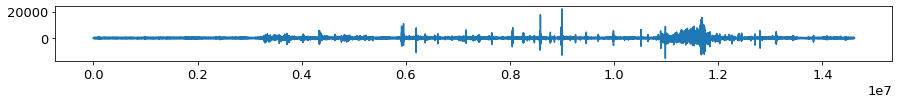

interactive(children=(IntSlider(value=0, description='fromx', layout=Layout(width='800px'), max=14604528), Int…

<function __main__.plot_graph(fromx, samples)>

In [134]:
plt.rcParams.update({'font.size': 13})
fig, (ax) = plt.subplots(nrows=1, sharex=True, figsize=(15,1))
#plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax.plot(signal_samples)
plt.show()

def plot_graph_zoom2(fromxzoom2, sampleszoom2):
    fig, (ax) = plt.subplots(nrows=1, sharex=True, figsize=(15,5))
    ax.plot(range(fromxzoom2,fromxzoom2+sampleszoom2), signal_samples[fromxzoom2:fromxzoom2+sampleszoom2])
    plt.show()
    
def plot_graph_zoom(fromxzoom, sampleszoom):
    fig, (ax) = plt.subplots(nrows=1, sharex=True, figsize=(15,2))
    ax.plot(range(fromxzoom,fromxzoom+sampleszoom), signal_samples[fromxzoom:fromxzoom+sampleszoom])
    plt.show()
    interact(plot_graph_zoom2, 
             fromxzoom2=widgets.IntSlider(min=fromxzoom, max=fromxzoom+sampleszoom, step=1, value=fromxzoom, layout=widgets.Layout(width='800px')), 
             sampleszoom2=widgets.IntSlider(min=1000, max=int(sampleszoom), step=1, value=int(sampleszoom), layout=widgets.Layout(width='800px')), 
            )
    
def plot_graph(fromx, samples):
    if ((fromx+samples)>len(signal_samples)):
        samples = len(signal_samples)-fromx
    fig, (ax) = plt.subplots(nrows=1, sharex=True, figsize=(15,2))
    ax.plot(range(fromx,fromx+samples), signal_samples[fromx:fromx+samples])
    plt.show()
    interact(plot_graph_zoom, 
             fromxzoom=widgets.IntSlider(min=fromx, max=fromx+samples, step=1, value=fromx, layout=widgets.Layout(width='800px')), 
             sampleszoom=widgets.IntSlider(min=1000, max=int(samples/4), step=1, value=int(samples/4), layout=widgets.Layout(width='800px')), 
            )
    
interact(plot_graph, 
         fromx=widgets.IntSlider(min=0, max=len(signal_samples)-10000, step=1, value=0, layout=widgets.Layout(width='800px')), 
         samples=widgets.IntSlider(min=10000, max=int(len(signal_samples)/4), step=1, value=int(len(signal_samples)/4), layout=widgets.Layout(width='800px')), 
        )

/storage/experiments/2024/0821_bourka_komarov/chronos/mp4/2024-08-21_02-36-11_343801-lightning.mp4.csv
2024-08-21 02:36:11.343801


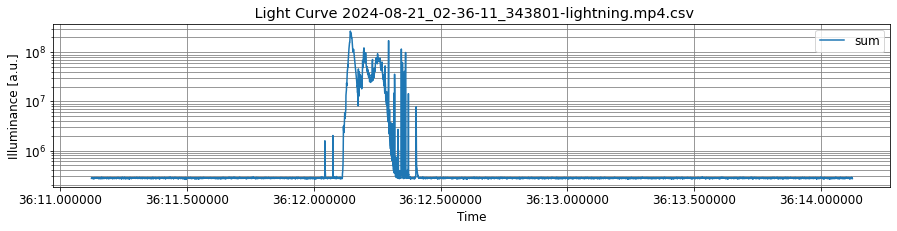

In [165]:
#for f in glob.iglob(directory + "/chronos/*16-11-32.607715-lightning.mp4.csv"): # generator, search immediate subdirectories 
for f in glob.glob('/storage/experiments/2024/0821_bourka_komarov/chronos/mp4/2024-08-21_02-36-11_343801-lightning.mp4.csv'):
    s = f.split('/')
    st = s[len(s)-1]
    print(f)
    light = pd.read_csv(f)

    trigger = pd.to_datetime(st.split('-l')[0],format='%Y-%m-%d_%H-%M-%S_%f')
    print(trigger)

    # ten offset triggeru -0.2201 jsem urcil experimentalne
    light['time'] = trigger + pd.to_timedelta(light.index * 0.000620220426339521 -0.2201, unit='s') # in seconds
    plt.figure(figsize=(15,3))
    plt.rc('font', size=12)    

    plt.plot(light['time'], light['0'], label='sum')
    plt.legend(loc=2)
    #plt.ylim(5e6, 3e7)
    plt.yscale('log')
    plt.title(' Light Curve ' + st)
    plt.xlabel('Time')
    plt.ylabel('Illuminance [a.u.]')
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='grey', linestyle='-')
    plt.legend()
    plt.show()


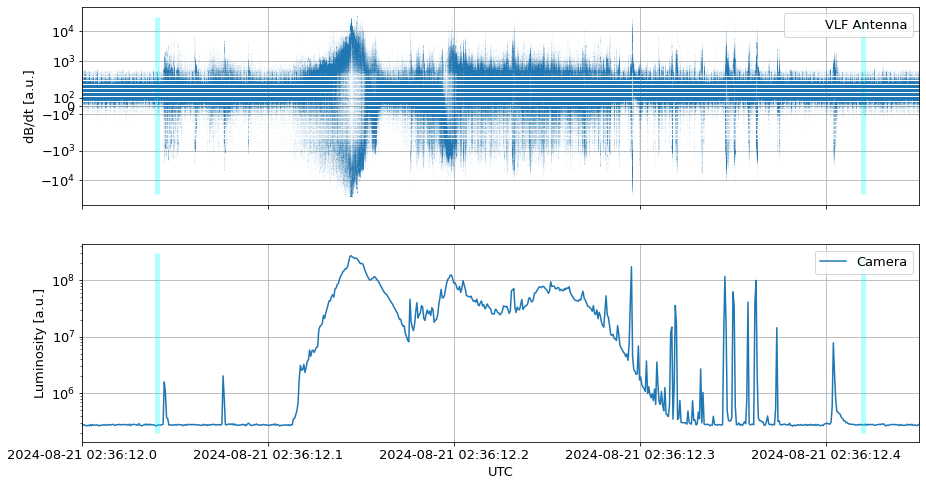

In [272]:
plt.rcParams.update({'font.size': 13})
fig, (ax) = plt.subplots(nrows=2, sharex=True, figsize=(15,8))

signal = pd.DataFrame(signal_samples)

signal['time'] = trigger + pd.to_timedelta(signal.index * 1/sps, unit='s') # in seconds

ax[0].vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=-3e4,ymax=3e4, lw=5, color='cyan', alpha=0.3)
ax[0].vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=-3e4,ymax=3e4, lw=5, color='cyan', alpha=0.3)

ax[0].plot(signal['time'], signal[0], linestyle='', marker='.', ms=0.02, label='VLF Antenna')
ax[0].set_yscale('symlog', linthresh=400)
ax[0].set_ylabel('dB/dt [a.u.]')
ax[0].grid()
ax[0].legend()
#ax[0].set_yscale('log')
ax[1].plot(light['time'], light['0'], label='Camera')
ax[1].set_yscale('log')
ax[1].set_ylabel('Luminosity [a.u.]')

ax[1].vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=2e5,ymax=3e8, lw=5, color='cyan', alpha=0.3)
ax[1].vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=2e5,ymax=3e8, lw=5, color='cyan', alpha=0.3)

#ax[1].set_ylim(7e6,7.5e6)
ax[1].set_xlim(pd.to_datetime('2024-08-21 02:36:12.0'),pd.to_datetime('2024-08-21 02:36:12.45'))
xfmt = lambda x, pos: mdates.DateFormatter('%Y-%m-%d %H:%M:%S.%f')(x)[:-5]
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(xfmt))
ax[1].set_xlabel('UTC')
ax[1].grid()
ax[1].legend()

plt.show()


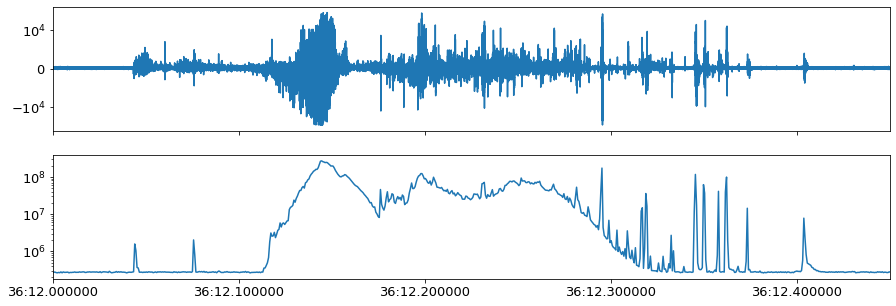

In [203]:
plt.rcParams.update({'font.size': 13})
fig, (ax) = plt.subplots(nrows=2, sharex=True, figsize=(15,5))

signal = pd.DataFrame(signal_samples)

signal['time'] = trigger + pd.to_timedelta(signal.index * 1/sps, unit='s') # in seconds

ax[0].plot(signal['time'],signal[0])
ax[0].set_yscale('symlog', linthresh=1e4)
#ax[0].set_yscale('symlog')
#ax[0].set_yscale('log')
ax[1].plot(light['time'], light['0'], label='sum')
ax[1].set_yscale('log')
#ax[1].set_ylim(7e6,7.5e6)
ax[1].set_xlim(pd.to_datetime('2024-08-21 02:36:12.0'),pd.to_datetime('2024-08-21 02:36:12.45'))
plt.show()


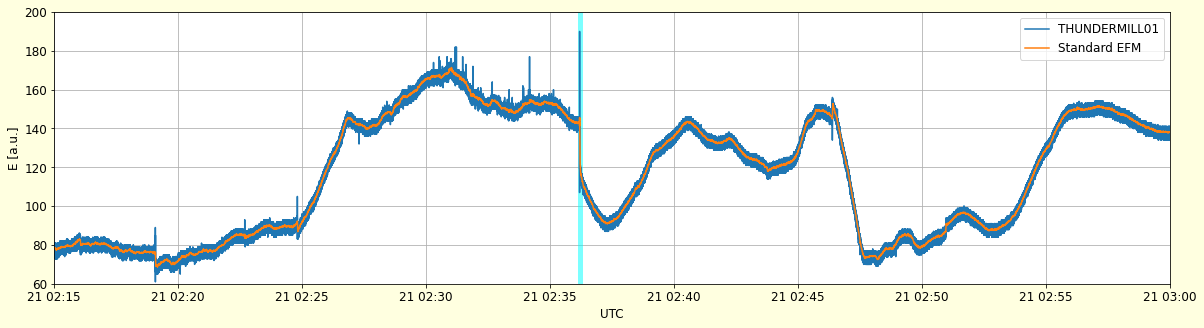

In [168]:
f = '/storage/experiments/2024/0821_bourka_komarov/efm/esuslog_20240821_011527_UTC.csv'

l=[]
l.extend(range(0,20))
df = pd.read_table(f, sep=',', header=None, comment='*',engine='python' )


df['time'] = pd.to_datetime(df[0], unit='s')
df.set_index('time', inplace=True, drop=False)

plt.figure(figsize=(20,5), facecolor='lightyellow')
plt.rc('font', size=12)    

plt.vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=60,ymax=200, lw=5, color='cyan', alpha=0.3)
plt.vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=60,ymax=200, lw=5, color='cyan', alpha=0.3)

#df['mean'] = df[30].rolling(20).mean()
#df['mean'] = df[30]
#df['mean'] = df.iloc[:,20:30].mean(axis=1)
#df['mean'] = df.iloc[:,1:].max(axis=1)-df.iloc[:,1:].min(axis=1)

#plt.plot(df.loc['2024-07-03 18:10':'2024-07-03 19:40','mean'])
plt.plot(df[30].rolling(1).mean(), label='THUNDERMILL01')
plt.plot(df[30].rolling(20).mean(), label='Standard EFM')
plt.xlim(pd.to_datetime('2024-08-21 02:15:00'),pd.to_datetime('2024-08-21 03:00:00'))

plt.ylim(60,200)
plt.xlabel('UTC')
plt.ylabel('E [a.u.]')
plt.grid()
plt.legend()
thundermill = df.copy()

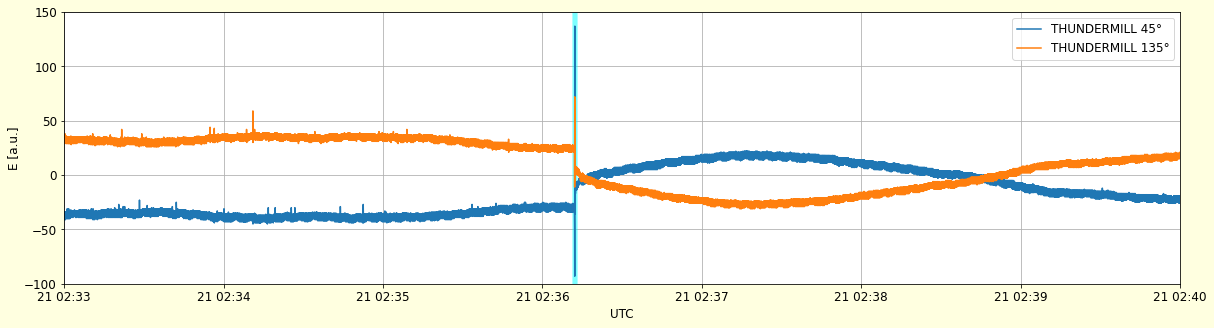

In [269]:
plt.figure(figsize=(20,5), facecolor='lightyellow')
plt.rc('font', size=12)    

#df['mean'] = df[30].rolling(20).mean()
#df['mean'] = df.iloc[:,20:30].mean(axis=1)
#df['mean'] = df.iloc[:,1:].max(axis=1)-df.iloc[:,1:].min(axis=1)

plt.vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=-100,ymax=150, lw=5, color='cyan', alpha=0.3)
plt.vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=-100,ymax=150, lw=5, color='cyan', alpha=0.3)

timeshift = 0.74
dc_offset = 118

#plt.plot(df.loc['2024-07-03 18:10':'2024-07-03 19:40','mean'])

plt.plot(thundermill['time'] + pd.to_timedelta(timeshift-0.015, unit='s'),thundermill[10] - dc_offset, label='THUNDERMILL 45°')
plt.plot(thundermill['time'] + pd.to_timedelta(timeshift-0.005, unit='s'),thundermill[30] - dc_offset, label='THUNDERMILL 135°')
#plt.plot(df[10].rolling(1).mean(), label='THUNDERMILL 45°')
#plt.plot(df[30].rolling(1).mean(), label='THUNDERMILL 135°')
plt.ylim(-100,150)
#plt.xlim(pd.to_datetime('2024-08-21 02:36:05'),pd.to_datetime('2024-08-21 02:36:20'))
plt.xlim(pd.to_datetime('2024-08-21 02:33:00'),pd.to_datetime('2024-08-21 02:40:00'))
#plt.yscale('log')

plt.xlabel('UTC')
plt.ylabel('E [a.u.]')
plt.grid()
plt.legend()



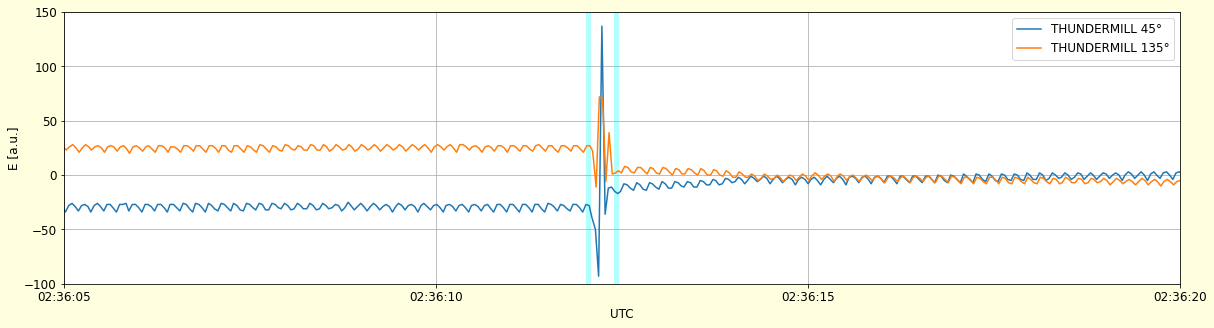

In [266]:
plt.figure(figsize=(20,5), facecolor='lightyellow')
plt.rc('font', size=12)    

#df['mean'] = df[30].rolling(20).mean()
#df['mean'] = df.iloc[:,20:30].mean(axis=1)
#df['mean'] = df.iloc[:,1:].max(axis=1)-df.iloc[:,1:].min(axis=1)

plt.vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=-100,ymax=150, lw=5, color='cyan', alpha=0.3)
plt.vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=-100,ymax=150, lw=5, color='cyan', alpha=0.3)

timeshift = 0.74
dc_offset = 118

#plt.plot(df.loc['2024-07-03 18:10':'2024-07-03 19:40','mean'])

plt.plot(thundermill['time'] + pd.to_timedelta(timeshift-0.015, unit='s'),thundermill[10] - dc_offset, label='THUNDERMILL 45°')
plt.plot(thundermill['time'] + pd.to_timedelta(timeshift-0.005, unit='s'),thundermill[30] - dc_offset, label='THUNDERMILL 135°')
#plt.plot(df[10].rolling(1).mean(), label='THUNDERMILL 45°')
#plt.plot(df[30].rolling(1).mean(), label='THUNDERMILL 135°')
plt.ylim(-100,150)
plt.xlim(pd.to_datetime('2024-08-21 02:36:05'),pd.to_datetime('2024-08-21 02:36:20'))
#plt.xlim(pd.to_datetime('2024-08-21 02:33:00'),pd.to_datetime('2024-08-21 02:40:00'))
#plt.yscale('log')

plt.xlabel('UTC')
plt.ylabel('E [a.u.]')
plt.grid()
plt.legend()



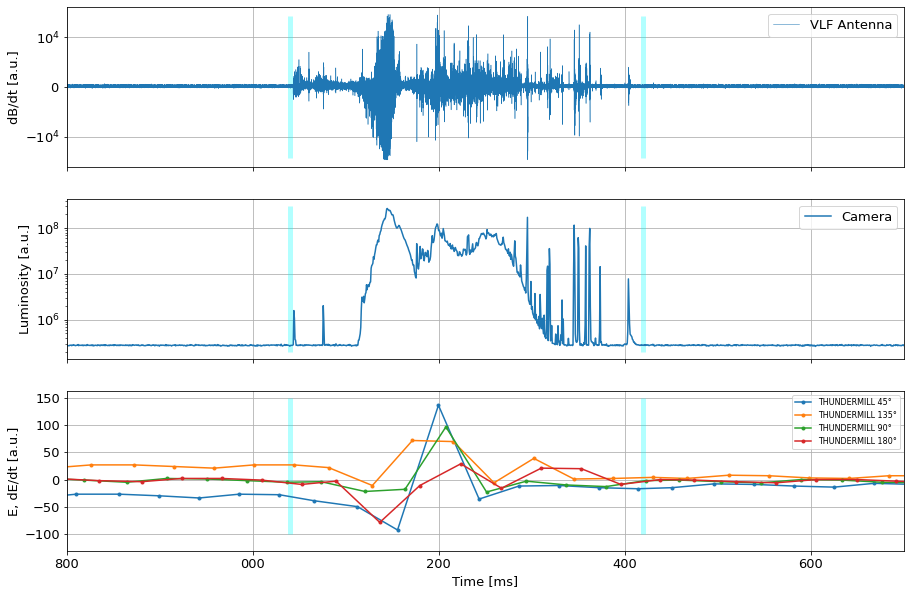

In [331]:
plt.rcParams.update({'font.size': 13})
fig, (ax) = plt.subplots(nrows=3, sharex=True, figsize=(15,10))

ax[0].vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=-3e4,ymax=3e4, lw=5, color='cyan', alpha=0.3)
ax[0].vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=-3e4,ymax=3e4, lw=5, color='cyan', alpha=0.3)

#ax[0].plot(signal['time'], signal[0], linestyle='', marker='.', ms=0.02, label='VLF Antenna')
ax[0].plot(signal['time'], signal[0], lw=0.5, label='VLF Antenna')
ax[0].legend()
ax[0].set_ylabel('dB/dt [a.u.]')
ax[0].set_yscale('symlog', linthresh=1e4)
ax[0].grid()
#ax[0].set_yscale('symlog')
#ax[0].set_yscale('log')

ax[1].vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=2e5,ymax=3e8, lw=5, color='cyan', alpha=0.3)
ax[1].vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=2e5,ymax=3e8, lw=5, color='cyan', alpha=0.3)

ax[1].plot(light['time'], light['0'], label='Camera')
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_ylabel('Luminosity [a.u.]')
ax[1].grid()
#ax[1].set_ylim(7e6,7.5e6)
#ax[2].set_xlim(pd.to_datetime('2024-08-21 02:36:12.0'),pd.to_datetime('2024-08-21 02:36:12.45'))
ax[2].set_xlim(pd.to_datetime('2024-08-21 02:36:11.8'),pd.to_datetime('2024-08-21 02:36:12.7'))

ax[2].vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=-100,ymax=150, lw=5, color='cyan', alpha=0.3)
ax[2].vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=-100,ymax=150, lw=5, color='cyan', alpha=0.3)

timeshift = 0.72
dc_offset = 118
#ax[2].plot(thundermill['time'] + pd.to_timedelta(timeshift-0.035, unit='s'),thundermill[1] - dc_offset, marker='.', label='THUNDERMILL 0°')
ax[2].plot(thundermill['time'] + pd.to_timedelta(timeshift-0.024, unit='s'),thundermill[10] - dc_offset, marker='.', label='THUNDERMILL 45°')
ax[2].plot(thundermill['time'] + pd.to_timedelta(timeshift-0.008, unit='s'),thundermill[30] - dc_offset, marker='.', label='THUNDERMILL 135°')
ax[2].plot(thundermill['time'] + pd.to_timedelta(timeshift-0.016, unit='s'),thundermill[20] - dc_offset, marker='.', label='THUNDERMILL 90°')
ax[2].plot(thundermill['time'] + pd.to_timedelta(timeshift, unit='s'),thundermill[40] - dc_offset, marker='.', label='THUNDERMILL 180°')
#ax[2].set_ylim(80,200)
#ax[2].set_yscale('symlog')
ax[2].set_ylabel('E, dE/dt [a.u.]')
ax[2].legend(prop = { "size": 8 })
xfmt = lambda x, pos: mdates.DateFormatter('%f')(x)[:-3]
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(xfmt))
ax[2].set_xlabel('Time [ms]')
ax[2].grid()
plt.show()


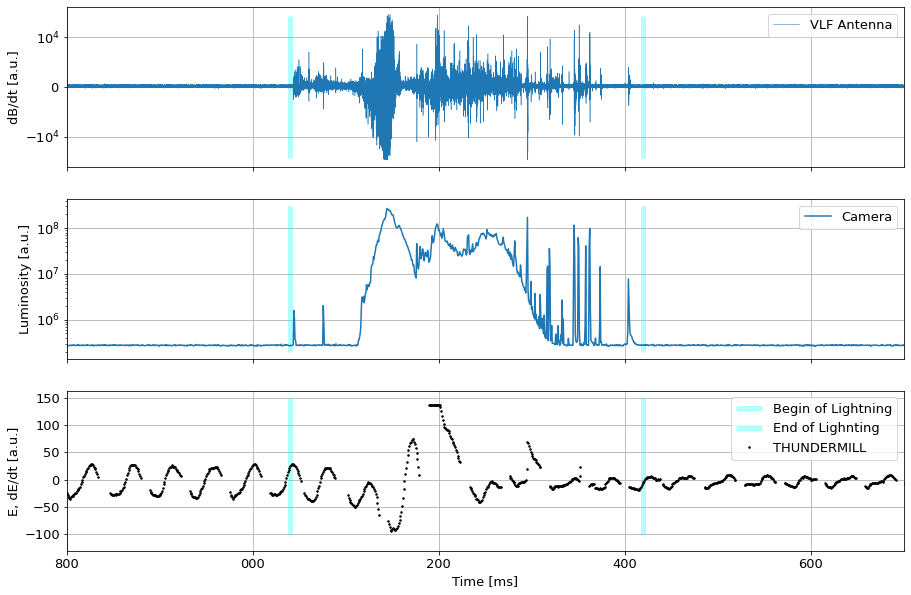

In [329]:
plt.rcParams.update({'font.size': 13})
fig, (ax) = plt.subplots(nrows=3, sharex=True, figsize=(15,10))

ax[0].vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=-3e4,ymax=3e4, lw=5, color='cyan', alpha=0.3)
ax[0].vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=-3e4,ymax=3e4, lw=5, color='cyan', alpha=0.3)

#ax[0].plot(signal['time'], signal[0], linestyle='', marker='.', ms=0.02, label='VLF Antenna')
ax[0].plot(signal['time'], signal[0], lw=0.5, label='VLF Antenna')
ax[0].legend()
ax[0].set_ylabel('dB/dt [a.u.]')
ax[0].set_yscale('symlog', linthresh=1e4)
ax[0].grid()
#ax[0].set_yscale('symlog')
#ax[0].set_yscale('log')

ax[1].vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=2e5,ymax=3e8, lw=5, color='cyan', alpha=0.3)
ax[1].vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=2e5,ymax=3e8, lw=5, color='cyan', alpha=0.3)

ax[1].plot(light['time'], light['0'], label='Camera')
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_ylabel('Luminosity [a.u.]')
ax[1].grid()
#ax[1].set_ylim(7e6,7.5e6)
#ax[2].set_xlim(pd.to_datetime('2024-08-21 02:36:12.0'),pd.to_datetime('2024-08-21 02:36:12.45'))
ax[2].set_xlim(pd.to_datetime('2024-08-21 02:36:11.8'),pd.to_datetime('2024-08-21 02:36:12.7'))

ax[2].vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=-100,ymax=150, lw=5, color='cyan', alpha=0.3)
ax[2].vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=-100,ymax=150, lw=5, color='cyan', alpha=0.3)

timeshift = 0.72
dc_offset = 118

for n in range(1,40):
    ax[2].plot(thundermill['time'] + pd.to_timedelta(timeshift-(40-n)*(0.035/40), unit='s'),thundermill[n] - dc_offset, ls='', marker='.', ms=3, color='black')

#ax[2].set_ylim(80,200)
#ax[2].set_yscale('symlog')
ax[2].set_ylabel('E, dE/dt [a.u.]')
ax[2].legend(['Begin of Lightning','End of Lighnting','THUNDERMILL'])
xfmt = lambda x, pos: mdates.DateFormatter('%f')(x)[:-3]
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(xfmt))
ax[2].set_xlabel('Time [ms]')
ax[2].grid()
plt.show()


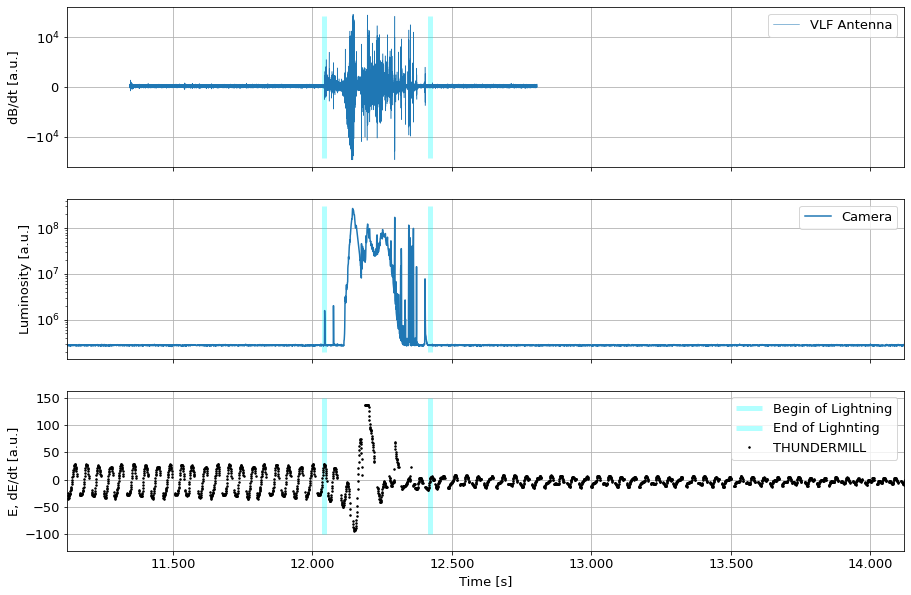

In [326]:
plt.rcParams.update({'font.size': 13})
fig, (ax) = plt.subplots(nrows=3, sharex=True, figsize=(15,10))

ax[0].vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=-3e4,ymax=3e4, lw=5, color='cyan', alpha=0.3)
ax[0].vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=-3e4,ymax=3e4, lw=5, color='cyan', alpha=0.3)

#ax[0].plot(signal['time'], signal[0], linestyle='', marker='.', ms=0.02, label='VLF Antenna')
ax[0].plot(signal['time'], signal[0], lw=0.5, label='VLF Antenna')
ax[0].legend()
ax[0].set_ylabel('dB/dt [a.u.]')
ax[0].set_yscale('symlog', linthresh=1e4)
ax[0].grid()
#ax[0].set_yscale('symlog')
#ax[0].set_yscale('log')

ax[1].vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=2e5,ymax=3e8, lw=5, color='cyan', alpha=0.3)
ax[1].vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=2e5,ymax=3e8, lw=5, color='cyan', alpha=0.3)

ax[1].plot(light['time'], light['0'], label='Camera')
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_ylabel('Luminosity [a.u.]')
ax[1].grid()
#ax[1].set_ylim(7e6,7.5e6)
#ax[2].set_xlim(pd.to_datetime('2024-08-21 02:36:12.0'),pd.to_datetime('2024-08-21 02:36:12.45'))
ax[2].set_xlim(pd.to_datetime('2024-08-21 02:36:11.12'),pd.to_datetime('2024-08-21 02:36:14.12'))

ax[2].vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=-100,ymax=150, lw=5, color='cyan', alpha=0.3)
ax[2].vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=-100,ymax=150, lw=5, color='cyan', alpha=0.3)

timeshift = 0.72
dc_offset = 118

for n in range(1,40):
    ax[2].plot(thundermill['time'] + pd.to_timedelta(timeshift-(40-n)*(0.035/40), unit='s'),thundermill[n] - dc_offset, ls='', marker='.', ms=3, color='black')

#ax[2].set_ylim(80,200)
#ax[2].set_yscale('symlog')
ax[2].set_ylabel('E, dE/dt [a.u.]')
ax[2].legend(['Begin of Lightning','End of Lighnting','THUNDERMILL'])
xfmt = lambda x, pos: mdates.DateFormatter('%S.%f')(x)[:-3]
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(xfmt))
ax[2].set_xlabel('Time [s]')
ax[2].grid()
plt.show()


In [318]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 
import matplotlib.dates as mdates

#directory = '/storage/experiments/2024/0608_bourka_sobeslav/chronos'
#directory = '/storage/experiments/2024/0621_bourka_HK_Plzen_Sobeslav/chronos'
#directory = '/storage/experiments/2024/0628_bourka_hosin/'
#directory = '/storage/experiments/2024/0627_bourka_JH/chronos'
#directory = '/storage/experiments/2024/0703_bourka_D3/chronos'
#directory = '/storage/experiments/2024/0727_bourka_sobeslav/chronos' # THUNDERMILL01
#directory = '/storage/experiments/2021/0609_bourka_sobeslav/video' # CG init
#directory = '/storage/experiments/2024/0807_bourka_MB/chronos' 
directory = '/storage/experiments/2024/0821_bourka_komarov/chronos'

/storage/experiments/2024/0821_bourka_komarov/chronos/mp4/2024-08-21_02-36-11_343801-lightning.mp4
928.0  x  928.0


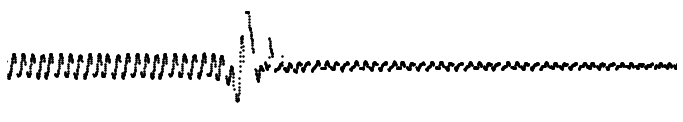

In [323]:
try:
    os.mkdir(directory + '/output')
except:
    pass

for f in glob.iglob(directory + "/mp4/*3438*.mp4"): # generator, search immediate subdirectories 
    s = f.split('/')
    st = s[len(s)-1]
    print(f)
    y = pd.read_csv(f + '.csv')    
    
    vcap = cv2.VideoCapture(f)

    if vcap.isOpened(): 
        # get vcap property 
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        
    print(width, ' x ', height)

    #w = 9.29
    w = (width+1)/100
    h = 1.5

    fig = plt.figure(frameon=False)
    fig.set_size_inches(w,h)
    fig.tight_layout()
    #ax = plt.Axes(fig, [0, 0, 1, 1])
    #ax.set_axis_off()
    #fig.add_axes(ax)
    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.axis('off')    
    
    timeshift = 0.72
    dc_offset = 118

    ax.set_xlim(pd.to_datetime('2024-08-21 02:36:11.12'),pd.to_datetime('2024-08-21 02:36:14.12'))

    for n in range(1,40):
        plt.plot(thundermill['time'] + pd.to_timedelta(timeshift-(40-n)*(0.035/40), unit='s'),thundermill[n] - dc_offset, ls='', marker='.', ms=3, color='black')

    #plt.plot(y.index,y['0'], color='black', linewidth=0.3)
    #plt.yscale('log')
    #plt.xlim([0,len(y)])
    fig.savefig(directory + '/output/' + st + '.csv.png', dpi=100, bbox_inches='tight', pad_inches = 0)
    plt.show()

None

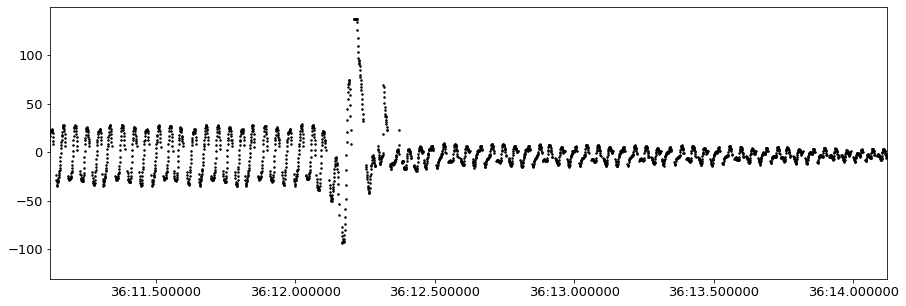

In [317]:
fig, (ax) = plt.subplots(nrows=1, sharex=True, figsize=(15,5))

timeshift = 0.74
dc_offset = 118

ax.set_xlim(pd.to_datetime('2024-08-21 02:36:11.12'),pd.to_datetime('2024-08-21 02:36:14.12'))

for n in range(1,40):
    ax.plot(thundermill['time'] + pd.to_timedelta(timeshift-(40-n)*(0.035/40), unit='s'),thundermill[n] - dc_offset, ls='', marker='.', ms=3, color='black')


#ax[0].set_ylim(80,200)
#ax[0].set_yscale('symlog')
plt.show()


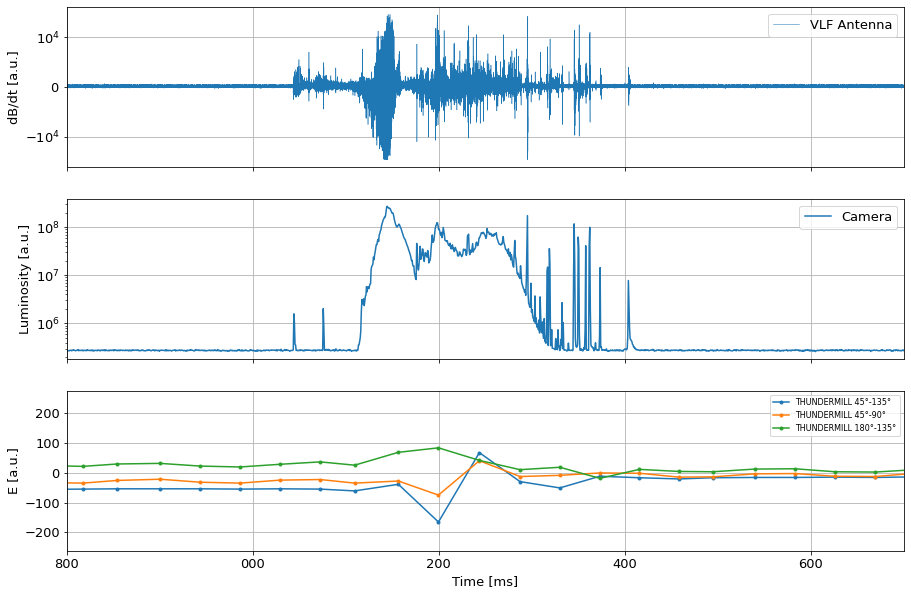

In [255]:
plt.rcParams.update({'font.size': 13})
fig, (ax) = plt.subplots(nrows=3, sharex=True, figsize=(15,10))

#plt.vlines([pd.to_datetime('2024-08-21 02:36:12.04')],ymin=60,ymax=200, lw=5, color='cyan', alpha=0.3)
#plt.vlines([pd.to_datetime('2024-08-21 02:36:12.42')],ymin=60,ymax=200, lw=5, color='cyan', alpha=0.3)

#ax[0].plot(signal['time'], signal[0], linestyle='', marker='.', ms=0.02, label='VLF Antenna')
ax[0].plot(signal['time'], signal[0], lw=0.5, label='VLF Antenna')
ax[0].legend()
ax[0].set_ylabel('dB/dt [a.u.]')
ax[0].set_yscale('symlog', linthresh=1e4)
ax[0].grid()
#ax[0].set_yscale('symlog')
#ax[0].set_yscale('log')
ax[1].plot(light['time'], light['0'], label='Camera')
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_ylabel('Luminosity [a.u.]')
ax[1].grid()
#ax[1].set_ylim(7e6,7.5e6)
#ax[2].set_xlim(pd.to_datetime('2024-08-21 02:36:12.0'),pd.to_datetime('2024-08-21 02:36:12.45'))
ax[2].set_xlim(pd.to_datetime('2024-08-21 02:36:11.8'),pd.to_datetime('2024-08-21 02:36:12.7'))
timeshift = 0.74
dc_offset = 118
ax[2].plot(thundermill['time'] + pd.to_timedelta(timeshift, unit='s'),thundermill[10]-thundermill[30], marker='.', label='THUNDERMILL 45°-135°')
ax[2].plot(thundermill['time'] + pd.to_timedelta(timeshift, unit='s'),thundermill[10]-thundermill[20], marker='.', label='THUNDERMILL 45°-90°')
ax[2].plot(thundermill['time'] + pd.to_timedelta(timeshift, unit='s'),thundermill[30]-thundermill[40], marker='.', label='THUNDERMILL 180°-135°')
#ax[2].set_ylim(80,200)
#ax[2].set_yscale('symlog')
ax[2].set_ylabel('E [a.u.]')
ax[2].legend(prop = { "size": 8 })
xfmt = lambda x, pos: mdates.DateFormatter('%f')(x)[:-3]
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(xfmt))
ax[2].set_xlabel('Time [ms]')
ax[2].grid()
plt.show()


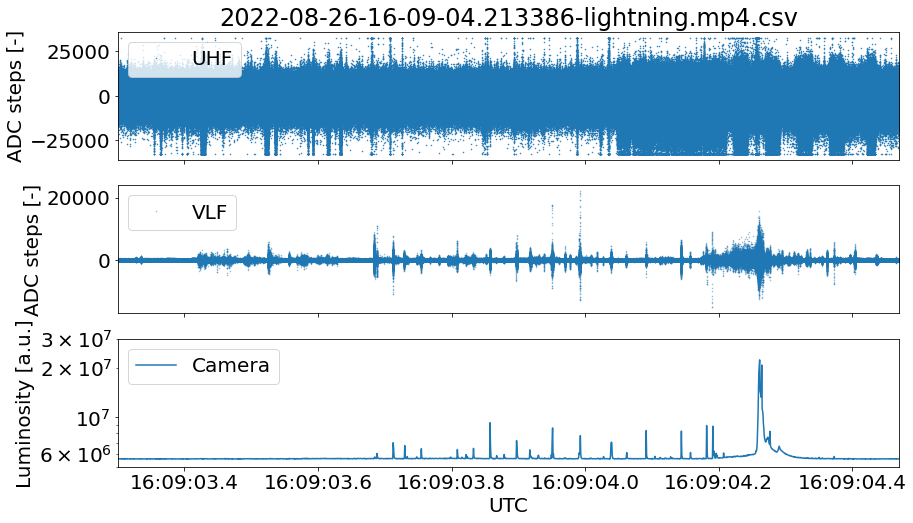

In [145]:
plt.rcParams.update({'font.size': 20})
fig, (ax) = plt.subplots(nrows=3, sharex=True, figsize=(14,8))

signalU = pd.DataFrame(signal_samples)
signalV = pd.DataFrame(signal_samples_vlf)

# ten offset triggeru 1.12xxx jsem urcil experimentalne
signalU['time'] = trigger + pd.to_timedelta(signalU.index * 1/sps - 1.121, unit='s') # in seconds
signalV['time'] = trigger + pd.to_timedelta(signalV.index * 1/sps - 1.121, unit='s') # in seconds

signalU.set_index('time', drop=False, inplace=True)
#signalU = signalU.resample('5us').mean()

ax[0].plot(signalU[0], linestyle="", marker=".", alpha=1.0, markersize=1, label='UHF')
#ax[0].plot(signalU[0], label='UHF')
ax[1].plot(signalV['time'],signalV[0], linestyle="", marker=".", alpha=0.5, markersize=1, label='VLF')
ax[2].plot(y['time'], y['0'], label='Camera')
ax[2].set_yscale('log')
ax[0].legend(loc=2)
ax[1].legend(loc=2)
ax[2].legend(loc=2)
ax[2].set_xlabel('UTC')
ax[0].set_ylabel('ADC steps [-]')
ax[1].set_ylabel('ADC steps [-]')
ax[2].set_ylabel('Luminosity [a.u.]')
ax[2].set_ylim(5e6, 3e7)
ax[2].set_xlim(pd.to_datetime('2022-08-26 16:09:03.30'), pd.to_datetime('2022-08-26 16:09:04.47'))
ax[0].set_title(st)

xfmt = lambda x, pos: mdates.DateFormatter('%H:%M:%S.%f')(x)[:-5]
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(xfmt))

#plt.savefig("/home/kakl/thesis_parallella/pic/fig_UHF_VLF_noise.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


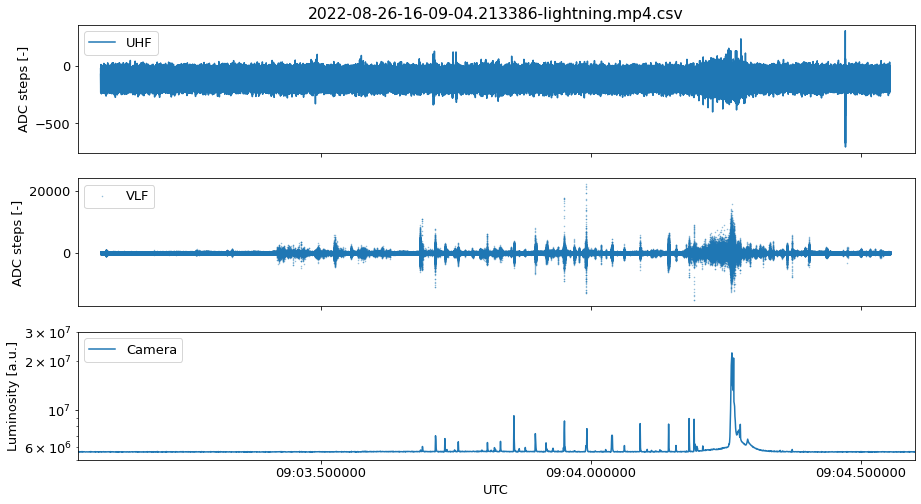

In [104]:
plt.rcParams.update({'font.size': 13})
fig, (ax) = plt.subplots(nrows=3, sharex=True, figsize=(15,8))

signalU = pd.DataFrame(signal_samples)
signalV = pd.DataFrame(signal_samples_vlf)

# ten offset triggeru 1.12xxx jsem urcil experimentalne
signalU['time'] = trigger + pd.to_timedelta(signalU.index * 1/sps - 1.121, unit='s') # in seconds
signalV['time'] = trigger + pd.to_timedelta(signalV.index * 1/sps - 1.121, unit='s') # in seconds

signalU.set_index('time', drop=False, inplace=True)
signalU = signalU.resample('1us').mean()

#ax[0].plot(signalU[0], linestyle="", marker=".", alpha=0.5, markersize=1, label='UHF')
ax[0].plot(signalU[0], label='UHF')
ax[1].plot(signalV['time'],signalV[0], linestyle="", marker=".", alpha=0.5, markersize=1, label='VLF')
ax[2].plot(y['time'], y['0'], label='Camera')
ax[2].set_yscale('log')
ax[0].legend(loc=2)
ax[1].legend(loc=2)
ax[2].legend(loc=2)
ax[2].set_xlabel('UTC')
ax[0].set_ylabel('ADC steps [-]')
ax[1].set_ylabel('ADC steps [-]')
ax[2].set_ylabel('Luminosity [a.u.]')
ax[2].set_ylim(5e6, 3e7)
ax[2].set_xlim(pd.to_datetime('2022-08-26 16:09:03.05'), pd.to_datetime('2022-08-26 16:09:04.6'))
ax[0].set_title(st)

#plt.savefig("/home/kakl/thesis_parallella/pic/fig_UHF_VLF.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


In [73]:
signalU.set_index('time', drop=False, inplace=True)
signalU = signalU.resample('1ms').mean()
signalU

,0
time,
2022-08-26 16:09:03.092,-6.871661
2022-08-26 16:09:03.093,-1.537600
2022-08-26 16:09:03.094,9.993600
2022-08-26 16:09:03.095,-6.196800
2022-08-26 16:09:03.096,11.204800
...,...
2022-08-26 16:09:04.549,-3.000000
2022-08-26 16:09:04.550,-1.190400
2022-08-26 16:09:04.551,-2.609600


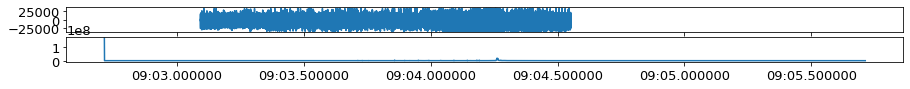

interactive(children=(IntSlider(value=-1200, description='fromx', layout=Layout(width='800px'), max=200, min=-…

<function __main__.plot_graph(fromx, tox)>

In [132]:
plt.rcParams.update({'font.size': 13})
fig, (ax) = plt.subplots(nrows=2, sharex=True, figsize=(15,1))
ax[0].plot(signal['time'],signal[0])
ax[1].plot(y['time'], y['0'], label='sum')
plt.show()

signal.set_index('time', inplace=True, drop=False)
y.set_index('time', inplace=True, drop=False)

def plot_graph(fromx, tox):
    global od
    global do
    fromtime = trigger + pd.to_timedelta(fromx, unit='ms')
    totime = trigger + pd.to_timedelta(tox, unit='ms')
    fig, (ax) = plt.subplots(nrows=2, sharex=True, figsize=(15,5))
    ax[0].plot(signal.loc[fromtime:totime]['time'],signal.loc[fromtime:totime][0], label='antenna')
    ax[1].plot(y.loc[fromtime:totime]['time'], y.loc[fromtime:totime]['0'], label='camera')
    plt.show()
    od = fromx
    do = tox
    
interact(plot_graph, 
         fromx=widgets.IntSlider(min=-1200, max=200, step=1, value=-1200, layout=widgets.Layout(width='800px')), 
         tox=widgets.IntSlider(min=-1200, max=200, step=1, value=200, layout=widgets.Layout(width='800px')),  
        )

In [128]:
plt.rcParams.update({'font.size': 13})

signal.set_index('time', inplace=True, drop=False)
y.set_index('time', inplace=True, drop=False)

def plot_graph(fromx, tox):
    global odod
    global dodo
    fromtime = trigger + pd.to_timedelta(fromx, unit='ms')
    totime = trigger + pd.to_timedelta(tox, unit='ms')
    fig, (ax) = plt.subplots(nrows=2, sharex=True, figsize=(15,5))
    ax[0].plot(signal.loc[fromtime:totime]['time'],signal.loc[fromtime:totime][0], label='antenna')
    ax[1].plot(y.loc[fromtime:totime]['time'], y.loc[fromtime:totime]['0'], label='camera', marker='o')
    plt.show()
    odod = fromx
    dodo = tox
    
interact(plot_graph, 
         fromx=widgets.IntSlider(min=od, max=do, step=1, value=od, layout=widgets.Layout(width='800px')), 
         tox=widgets.IntSlider(min=od, max=do, step=1, value=do, layout=widgets.Layout(width='800px')),  
        )

interactive(children=(IntSlider(value=-35, description='fromx', layout=Layout(width='800px'), max=47, min=-35)…

<function __main__.plot_graph(fromx, tox)>

In [130]:
plt.rcParams.update({'font.size': 13})

signal.set_index('time', inplace=True, drop=False)
y.set_index('time', inplace=True, drop=False)

def plot_graph(fromx, tox):
    fromx = fromx/10
    tox = tox/10
    fromtime = trigger + pd.to_timedelta(fromx, unit='ms')
    totime = trigger + pd.to_timedelta(tox, unit='ms')
    #fig, (ax) = plt.subplots(nrows=2, sharex=True, figsize=(15,2))
    fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(15,5))
    ax.plot(signal.loc[fromtime:totime]['time'],signal.loc[fromtime:totime][0], label='antenna')
    #ax[1].plot(y.loc[fromtime:totime]['time'], y.loc[fromtime:totime]['0'], label='camera', marker='o')
    plt.show()
    
interact(plot_graph, 
         fromx=widgets.IntSlider(min=odod*10, max=dodo*10, step=1, value=odod*10, layout=widgets.Layout(width='800px')), 
         tox=widgets.IntSlider(min=odod*10, max=dodo*10, step=1, value=dodo*10, layout=widgets.Layout(width='800px')),  
        )

interactive(children=(IntSlider(value=-220, description='fromx', layout=Layout(width='800px'), max=-210, min=-…

<function __main__.plot_graph(fromx, tox)>